In [1]:
import sys
sys.path.append("../../post_proc")

import post_proc
import pickle
import matplotlib.pyplot as plt
import numpy as np

import sys 
import pickle 

# needed to import FemPdeBase in subfiles
sys.path.append("../../testbed")

sys.path.append("../../testbed/pde3/")
import FemPde3 as FemPde3

In [2]:
# load data from file
with open("data/fem_pde3_5dof.p", "rb") as f:
    pde3_5dof = pickle.load(f)
    
with open("data/fem_pde3_50dof.p", "rb") as f:
    pde3_50dof = pickle.load(f)
    
with open("data/fem_pde3_500dof.p", "rb") as f:
    pde3_500dof = pickle.load(f)
    
with open("data/fem_pde3_5000dof.p", "rb") as f:
    pde3_5000dof = pickle.load(f)
    
with open("data/fem_pde3_50000dof.p", "rb") as f:
    pde3_50000dof = pickle.load(f)

In [3]:
time_pde3_5dof = [t[0] for t in pde3_5dof]
time_pde3_50dof = [t[0] for t in pde3_50dof]
time_pde3_500dof = [t[0] for t in pde3_500dof]
time_pde3_5000dof = [t[0] for t in pde3_5000dof]
time_pde3_50000dof = [t[0] for t in pde3_50000dof]


t_data = [time_pde3_5dof, time_pde3_50dof, time_pde3_500dof, time_pde3_5000dof, time_pde3_50000dof]

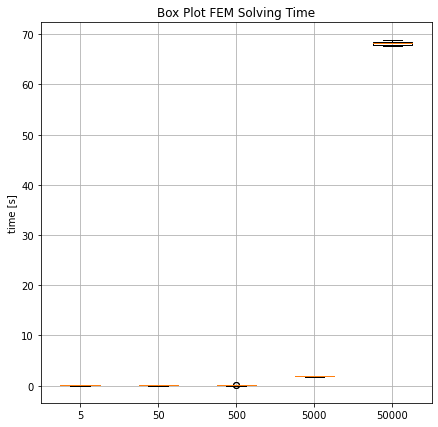

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
labels = ['5', '50', '500','5000', '50000']
ax.boxplot(t_data, labels=labels)
ax.set_title('Box Plot FEM Solving Time')
ax.set_ylabel('time [s]')
plt.grid()
plt.show()
# fig.savefig("time_boxplot_pde_0a_0b_1_2_4_5_6_7_8_9.pdf", bbox_inches='tight')

In [5]:
mem_pde3_5dof = [t[1]/10**6 for t in pde3_5dof]
mem_pde3_50dof = [t[1]/10**6 for t in pde3_50dof]
mem_pde3_500dof = [t[1]/10**6 for t in pde3_500dof]
mem_pde3_5000dof = [t[1]/10**6 for t in pde3_5000dof]
mem_pde3_50000dof = [t[1]/10**6 for t in pde3_50000dof]

m_data = [mem_pde3_5dof, mem_pde3_500dof, mem_pde3_500dof, mem_pde3_5000dof, mem_pde3_50000dof]

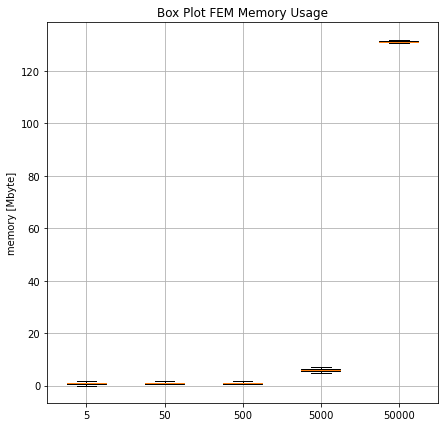

In [6]:
fig, ax = plt.subplots(figsize=(7,7))
labels = ['5', '50', '500','5000', '50000']
ax.boxplot(m_data, labels=labels)
ax.set_title('Box Plot FEM Memory Usage')
ax.set_ylabel('memory [Mbyte]')
plt.grid()
plt.show()
#fig.savefig("mem_boxplot_pde_0a_0b_1_2_4_5_6_7_8_9.pdf", bbox_inches='tight')

In [7]:
dist_pde3_5dof = [t[2] for t in pde3_5dof]
dist_pde3_50dof = [t[2] for t in pde3_50dof]
dist_pde3_500dof = [t[2] for t in pde3_500dof]
dist_pde3_5000dof = [t[2] for t in pde3_5000dof]
dist_pde3_50000dof = [t[2] for t in pde3_50000dof]


d_data = [dist_pde3_5dof, dist_pde3_50dof, dist_pde3_500dof, dist_pde3_5000dof, dist_pde3_50000dof]

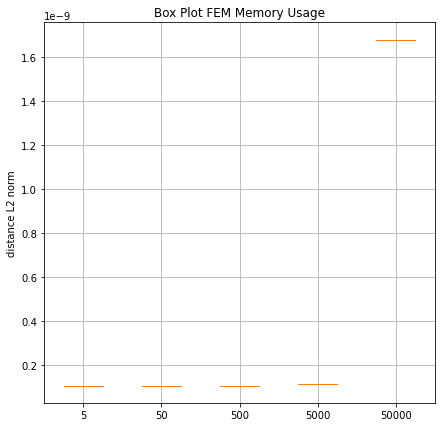

In [8]:
fig, ax = plt.subplots(figsize=(7,7))
labels = ['5', '50', '500','5000', '50000']
ax.boxplot(d_data, labels=labels)
ax.set_title('Box Plot FEM Memory Usage')
ax.set_ylabel('distance L2 norm')
plt.grid()
plt.show()
#fig.savefig("mem_boxplot_pde_0a_0b_1_2_4_5_6_7_8_9.pdf", bbox_inches='tight')

In [9]:
mean_d_data = [np.mean(d) for d in d_data]
mean_t_data = [np.mean(t) for t in t_data]
mean_m_data = [np.mean(m) for m in m_data]
std_d_data = [np.std(d) for d in d_data]
std_t_data = [np.std(t) for t in t_data]
std_m_data = [np.std(m) for m in m_data]

In [10]:
import numpy as np
import scipy.stats

def mean_confidence_interval(dof, se, confidence=0.95):
    return se * scipy.stats.t.ppf((1 + confidence) / 2., dof)
    

time_convidence = []
for i in range(5):
    time_convidence.append(mean_confidence_interval(19, std_t_data[i]/np.sqrt(20), confidence=0.95))

mean_t_data = np.array(mean_t_data)
time_convidence = np.array(time_convidence)

memory_convidence = []
for i in range(5):
    memory_convidence.append(mean_confidence_interval(19, std_m_data[i]/np.sqrt(20), confidence=0.95))

mean_m_data = np.array(mean_m_data)
memory_convidence = np.array(memory_convidence)

print("time convidence: " + str(time_convidence))
print("memory convidence: " + str(memory_convidence))

time convidence: [0.00224174 0.00324061 0.00435546 0.05371234 0.17357785]
memory convidence: [0.1924507  0.1603997  0.1603997  0.27387405 0.1858464 ]


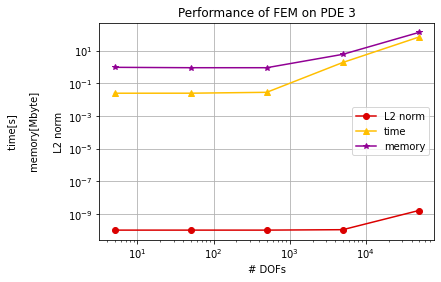

In [11]:
labels = [5, 50, 500, 5000, 50000]
plt.loglog(labels, mean_d_data, marker="o", color="#db0000", label="L2 norm")
plt.loglog(labels, mean_t_data, marker="^", color="#ffbf00", label="time")
plt.loglog(labels, mean_m_data, marker="*", color="#910094", label="memory")
plt.grid()
plt.xlabel("# DOFs")
plt.ylabel(" time[s] \n\n memory[Mbyte] \n\n L2 norm ")
plt.legend()
plt.title("Performance of FEM on PDE 3")
plt.savefig("./pde3_ndof.pdf", bbox_inches='tight')

NameError: name 'fempde3' is not defined

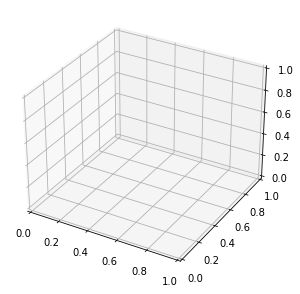

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
    
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(0, 1.01, 0.01)
X, Y = np.meshgrid(x, y)
    
zs0 = np.array([(fempde3.exact(np.array([x,y])) - fempde3.approx(np.array([x,y])))**2 for x,y in zip(np.ravel(X), np.ravel(Y))])

Z = zs0.reshape(X.shape)
    
ax.plot_surface(X, Y, Z, cmap=cm.gnuplot)
    
fig.tight_layout()
    
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Squared Error over the Domain of PDE 3", fontsize=20)
plt.show()
fig.savefig("squared_domain_error.pdf", bbox_inches='tight')